**Notes**: Twitter has permanently suspended the account @realDonaldTrump on 08 Jan 2021, so the last tweet captured in this dataset is on 08 Jan 2021.

In [180]:
import pandas as pd
import requests
from io import StringIO

# Getting the content of the file from the URL
url = 'https://raw.githubusercontent.com/MarkHershey/CompleteTrumpTweetsArchive/master/data/realDonaldTrump_in_office.csv'
response = requests.get(url)
file_content = StringIO(response.text)

# Reading the file content as a text file and processing each line manually to handle inconsistencies
lines = file_content.readlines()

# Processing the lines to extract columns
data = []
for line in lines[1:]:  # Skipping the header
    parts = line.split(',')
    if len(parts) >= 4:  # Making sure the line has enough parts to extract information
        id_ = parts[0].strip()
        time = parts[1].strip()
        tweet_url = parts[2].strip()
        tweet_text = ','.join(parts[3:]).strip()  # Joining the remaining parts as tweet text
        data.append([id_, time, tweet_url, tweet_text])

# Creating a dataframe from the processed data
df = pd.DataFrame(data, columns=['ID', 'Time', 'Tweet URL', 'Tweet Text'])
df

,ID,Time,Tweet URL,Tweet Text
0,@realDonaldTrump,2017-01-20 06:31,https://twitter.com/realDonaldTrump/status/822...,"""It all begins today! I will see you at 11:00 ..."
1,@realDonaldTrump,2017-01-20 11:51,https://twitter.com/realDonaldTrump/status/822...,"""Today we are not merely transferring power fr..."
2,@realDonaldTrump,2017-01-20 11:51,https://twitter.com/realDonaldTrump/status/822...,"""power from Washington, D.C. and giving it bac..."
3,@realDonaldTrump,2017-01-20 11:52,https://twitter.com/realDonaldTrump/status/822...,"""What truly matters is not which party control..."
4,@realDonaldTrump,2017-01-20 11:53,https://twitter.com/realDonaldTrump/status/822...,"""January 20th 2017, will be remembered as the ..."
...,...,...,...,...
23070,@realDonaldTrump,2021-01-07 04:13,https://twitter.com/realDonaldTrump/status/134...,"""I am asking for everyone at the U.S. Capitol ..."
23071,@realDonaldTrump,2021-01-07 05:17,https://twitter.com/realDonaldTrump/status/134...,"""https://t.co/Pm2PKV0Fp3"""
23072,@realDonaldTrump,2021-01-08 08:10,https://twitter.com/realDonaldTrump/status/134...,"""https://t.co/csX07ZVWGe"""
23073,@realDonaldTrump,2021-01-08 22:46,https://twitter.com/realDonaldTrump/status/134...,"""The 75,000,000 great American Patriots who vo..."


In [181]:
filtered_df = df[df['Tweet Text'].str.contains('virus|pandemic|covid', case=False, na=False)]
filtered_df

,ID,Time,Tweet URL,Tweet Text
9299,@realDonaldTrump,2019-08-03 20:09,https://twitter.com/realDonaldTrump/status/115...,"""RT @Franklin_Graham: 5 yrs ago today Dr. Kent..."
13736,@realDonaldTrump,2020-01-24 15:18,https://twitter.com/realDonaldTrump/status/122...,"""China has been working very hard to contain t..."
13891,@realDonaldTrump,2020-01-27 22:56,https://twitter.com/realDonaldTrump/status/122...,"""We are in very close communication with China..."
13902,@realDonaldTrump,2020-01-28 11:42,https://twitter.com/realDonaldTrump/status/122...,"""RT @SenateForeign: Today I was briefed by lea..."
13940,@realDonaldTrump,2020-01-29 03:11,https://twitter.com/realDonaldTrump/status/122...,"""RT @OANN: Johnson &amp; Johnson to create cor..."
...,...,...,...,...
22888,@realDonaldTrump,2020-12-28 07:21,https://twitter.com/realDonaldTrump/status/134...,"""Good news on Covid Relief Bill. Information t..."
22899,@realDonaldTrump,2020-12-29 14:47,https://twitter.com/realDonaldTrump/status/134...,"""RT @SenatorBraun: I want to thank Pres. Trump..."
22904,@realDonaldTrump,2020-12-29 21:46,https://twitter.com/realDonaldTrump/status/134...,"""$2000 for our great people, not $600! They ha..."
22947,@realDonaldTrump,2021-01-02 04:56,https://twitter.com/realDonaldTrump/status/134...,"""Our Republican Senate just missed the opportu..."


In [182]:
weeks_range = pd.date_range(start='2020-01-05', end='2021-01-03', freq='W-Sun')

In [183]:
from datetime import datetime, timedelta

# Converting the 'Time' column to datetime objects
filtered_df['Time'] = pd.to_datetime(filtered_df['Time'], errors='coerce')

# Further filtering the tweets to only include those between 2020-01-05 and 2021-01-02
start_date = datetime.strptime('2020-01-05', '%Y-%m-%d')
end_date = datetime.strptime('2021-01-02', '%Y-%m-%d')
filtered_df_2020_2021 = filtered_df[(filtered_df['Time'] >= start_date) & (filtered_df['Time'] <= end_date)]

# Counting the number of tweets each week
filtered_df_2020_2021.set_index('Time', inplace=True)
weekly_counts = filtered_df_2020_2021.resample('W-Sun').size()

# Resetting the index of the dataframe
filtered_df_2020_2021.reset_index(inplace=True)

weekly_counts = weekly_counts.reindex(weeks_range, fill_value=0)
weekly_counts

/var/folders/vh/bnk8gjpn5998vq44hzdttvwc0000gn/T/ipykernel_63103/3732517872.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Time'] = pd.to_datetime(filtered_df['Time'], errors='coerce')


2020-01-05     0
2020-01-12     0
2020-01-19     0
2020-01-26     1
2020-02-02     6
2020-02-09     2
2020-02-16     0
2020-02-23     0
2020-03-01    22
2020-03-08    21
2020-03-15    56
2020-03-22    83
2020-03-29    41
2020-04-05    38
2020-04-12    33
2020-04-19    26
2020-04-26    41
2020-05-03    25
2020-05-10    10
2020-05-17    19
2020-05-24    13
2020-05-31    14
2020-06-07     2
2020-06-14     3
2020-06-21     4
2020-06-28     8
2020-07-05     7
2020-07-12     7
2020-07-19     5
2020-07-26     6
2020-08-02    23
2020-08-09     8
2020-08-16     3
2020-08-23    12
2020-08-30     2
2020-09-06     8
2020-09-13    10
2020-09-20    10
2020-09-27     3
2020-10-04     6
2020-10-11    10
2020-10-18     8
2020-10-25     3
2020-11-01    11
2020-11-08     1
2020-11-15     3
2020-11-22     6
2020-11-29     2
2020-12-06     0
2020-12-13     3
2020-12-20     2
2020-12-27     2
2021-01-03     3
Freq: W-SUN, dtype: int64

In [184]:
# Filtering the tweets to include only those that contain China-related keywords
china_keywords = ['china', 'chinese', 'wuhan', 'beijing', 'ccp', 'xi', 'communist', 'prc', 'communism']
china_filtered_df = filtered_df_2020_2021[filtered_df_2020_2021['Tweet Text']
                                        .str.contains('|'.join(china_keywords), case=False, na=False)]

# Counting the number of China-related tweets each week
china_filtered_df.set_index('Time', inplace=True)
china_weekly_counts = china_filtered_df.resample('W-Sun').size()

# Resetting the index of the dataframe
china_filtered_df.reset_index(inplace=True)

# Displaying the weekly counts of China-related tweets
china_weekly_counts = china_weekly_counts.reindex(weeks_range, fill_value=0)
china_weekly_counts

2020-01-05     0
2020-01-12     0
2020-01-19     0
2020-01-26     1
2020-02-02     5
2020-02-09     2
2020-02-16     0
2020-02-23     0
2020-03-01     3
2020-03-08     4
2020-03-15     8
2020-03-22    14
2020-03-29     2
2020-04-05     1
2020-04-12     8
2020-04-19     5
2020-04-26     2
2020-05-03     1
2020-05-10     3
2020-05-17     4
2020-05-24     1
2020-05-31     4
2020-06-07     0
2020-06-14     0
2020-06-21     0
2020-06-28     2
2020-07-05     1
2020-07-12     5
2020-07-19     1
2020-07-26     2
2020-08-02     4
2020-08-09     5
2020-08-16     3
2020-08-23     0
2020-08-30     0
2020-09-06     3
2020-09-13     5
2020-09-20     1
2020-09-27     0
2020-10-04     0
2020-10-11     3
2020-10-18     1
2020-10-25     0
2020-11-01     2
2020-11-08     0
2020-11-15     0
2020-11-22     1
2020-11-29     0
2020-12-06     0
2020-12-13     1
2020-12-20     2
2020-12-27     2
2021-01-03     1
Freq: W-SUN, dtype: int64

In [185]:
# Filtering the tweets to include only those that contain xenophobic keywords
xenophobic_keywords = ['china virus', 'chinese virus', 'wuhan virus', 'kung flu']
xenophobic_df = filtered_df_2020_2021[filtered_df_2020_2021['Tweet Text']
                                     .str.contains('|'.join(xenophobic_keywords), case=False, na=False)]

# Counting the number of xenophobic tweets each week
xenophobic_df.set_index('Time', inplace=True)
xenophobic_weekly_counts = xenophobic_df.resample('W-Sun').size()

# Displaying the weekly counts of xenophobic tweets
xenophobic_weekly_counts = xenophobic_weekly_counts.reindex(weeks_range, fill_value=0)
xenophobic_weekly_counts

2020-01-05    0
2020-01-12    0
2020-01-19    0
2020-01-26    0
2020-02-02    0
2020-02-09    0
2020-02-16    0
2020-02-23    0
2020-03-01    0
2020-03-08    0
2020-03-15    1
2020-03-22    7
2020-03-29    1
2020-04-05    0
2020-04-12    1
2020-04-19    0
2020-04-26    1
2020-05-03    1
2020-05-10    0
2020-05-17    0
2020-05-24    0
2020-05-31    1
2020-06-07    0
2020-06-14    0
2020-06-21    0
2020-06-28    0
2020-07-05    0
2020-07-12    5
2020-07-19    0
2020-07-26    2
2020-08-02    4
2020-08-09    3
2020-08-16    0
2020-08-23    0
2020-08-30    0
2020-09-06    3
2020-09-13    4
2020-09-20    1
2020-09-27    0
2020-10-04    0
2020-10-11    3
2020-10-18    1
2020-10-25    0
2020-11-01    1
2020-11-08    0
2020-11-15    0
2020-11-22    1
2020-11-29    0
2020-12-06    0
2020-12-13    1
2020-12-20    2
2020-12-27    2
2021-01-03    1
Freq: W-SUN, dtype: int64

In [186]:
weekly_counts = weekly_counts.to_frame().reset_index().rename(columns = {'index':'week'})
china_weekly_counts = china_weekly_counts.to_frame().reset_index().rename(columns = {'index':'week'})
xenophobic_weekly_counts = xenophobic_weekly_counts.to_frame().reset_index().rename(columns = {'index':'week'})

combined_weekly_counts = weekly_counts.merge(china_weekly_counts, on = 'week').merge(xenophobic_weekly_counts, on = 'week')

In [209]:
combined_weekly_counts.rename(columns={
    'week': 'week',
    '0_x': 'weekly_counts',
    '0_y': 'china_weekly_counts',
    0: 'xenophobic_weekly_counts'
}, inplace=True)
combined_weekly_counts.columns

Index(['week', 'weekly_counts', 'china_weekly_counts',
       'xenophobic_weekly_counts'],
      dtype='object')

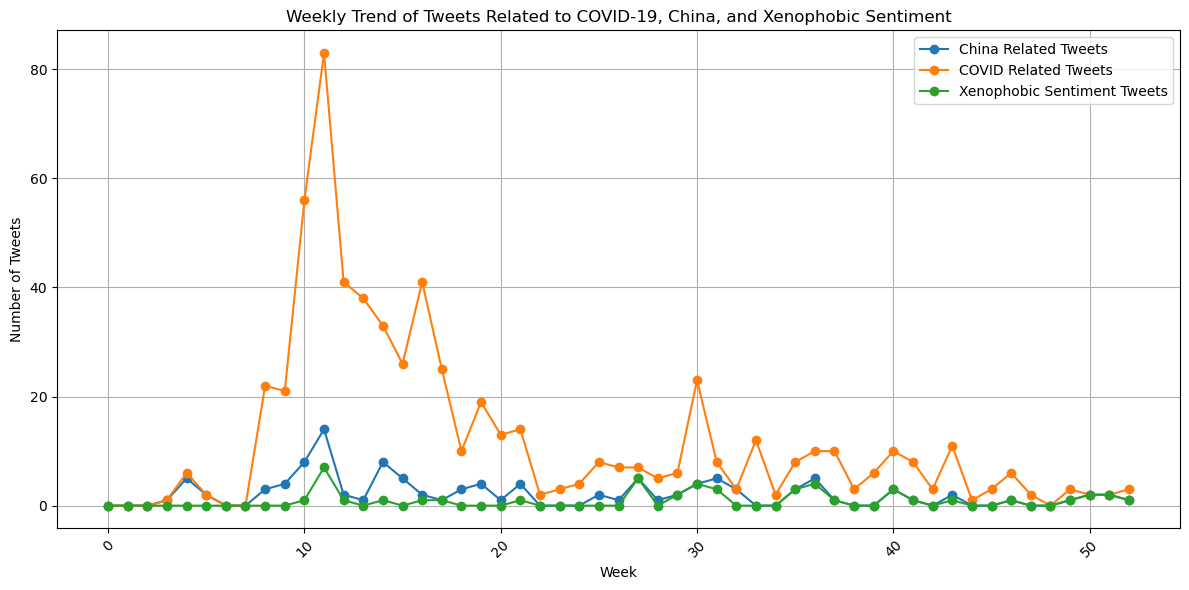

In [211]:
import matplotlib.pyplot as plt


# Creating the visualization
plt.figure(figsize=(12, 6))
plt.plot(combined_weekly_counts.index, combined_weekly_counts['china_weekly_counts'], label='China Related Tweets', marker='o')
plt.plot(combined_weekly_counts.index, combined_weekly_counts['weekly_counts'], label='COVID Related Tweets', marker='o')
plt.plot(combined_weekly_counts.index, combined_weekly_counts['xenophobic_weekly_counts'], label='Xenophobic Sentiment Tweets', marker='o')

# Adding labels and title
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.title('Weekly Trend of Tweets Related to COVID-19, China, and Xenophobic Sentiment')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Displaying the visualization
plt.show()

In [135]:
# Loading the Google Trends data
google_trends_path = '/Users/jinwens/Desktop/google_trend.xlsx'
google_trends_df = pd.read_excel(google_trends_path)

google_trends_df

,week,china,china_virus,chinese_virus,wuhan_virus,china_youtube,china_virus_youtube,chinese_virus_youtube,wuhan_virus_youtube
0,2020-01-05,30,1,1,0,43,0,0,0
1,2020-01-12,32,3,2,1,50,1,0,0
2,2020-01-19,59,100,55,72,69,50,12,50
3,2020-01-26,70,92,43,100,90,90,25,100
4,2020-02-02,53,39,19,37,75,64,11,35
5,2020-02-09,47,31,13,25,69,59,10,23
6,2020-02-16,40,19,10,14,59,27,6,11
7,2020-02-23,48,27,15,17,63,37,6,10
8,2020-03-01,51,29,15,14,62,37,15,11
9,2020-03-08,69,52,22,29,77,55,14,16


In [208]:
merged_df = combined_weekly_counts.merge(google_trends_df, on = 'week')
merged_df

,week,weekly_counts,china_weekly_counts,xenophobic_weekly_counts,china,china_virus,chinese_virus,wuhan_virus,china_youtube,china_virus_youtube,chinese_virus_youtube,wuhan_virus_youtube
0,2020-01-05,0,0,0,30,1,1,0,43,0,0,0
1,2020-01-12,0,0,0,32,3,2,1,50,1,0,0
2,2020-01-19,0,0,0,59,100,55,72,69,50,12,50
3,2020-01-26,1,1,0,70,92,43,100,90,90,25,100
4,2020-02-02,6,5,0,53,39,19,37,75,64,11,35
5,2020-02-09,2,2,0,47,31,13,25,69,59,10,23
6,2020-02-16,0,0,0,40,19,10,14,59,27,6,11
7,2020-02-23,0,0,0,48,27,15,17,63,37,6,10
8,2020-03-01,22,3,0,51,29,15,14,62,37,15,11
9,2020-03-08,21,4,0,69,52,22,29,77,55,14,16
